Estudo Dirigido - Capítulo 6: Estabilidade de Sistemas Lineares com Retroação
1. Resumo Estruturado do Capítulo
1.1 Conceitos Fundamentais

Estabilidade Absoluta: Um sistema é estável se, para toda entrada limitada, produz uma saída limitada (critério BIBO - Bounded Input, Bounded Output).

Estabilidade Relativa: Mede o grau de estabilidade de um sistema já estável, relacionado à proximidade dos polos em relação ao eixo imaginário.
1.2 Critério de Routh-Hurwitz

Método algébrico para determinar estabilidade sem calcular raízes:

    Condição necessária: Todos os coeficientes da equação característica devem ser não-nulos e de mesmo sinal

    Condição suficiente: Nenhuma mudança de sinal na primeira coluna do arranjo de Routh

Casos especiais:

    Zero na primeira coluna com outros elementos não-nulos

    Linha inteira de zeros (polinômio auxiliar)

    Raízes repetidas no eixo jω

1.3 Estabilidade no Domínio do Estado

Para sistemas na forma espaço de estado ẋ = Ax:

    Estabilidade é determinada pelos autovalores de A

    Sistema é estável se todos os autovalores têm parte real negativa

1.4 Aplicações Práticas

    Controle de veículos sobre lagartas

    Sistema de leitura de acionador de disco

    Controle de robôs e sistemas mecânicos

In [21]:
# Célula 1: Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy import signal
import sympy as sp
from IPython.display import display, Markdown, HTML

# Configurações de visualização
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

In [22]:
# Célula 2: Função para implementar o Critério de Routh-Hurwitz
def routh_hurwitz(coeffs):
    """
    Implementa o critério de Routh-Hurwitz
    coeffs: lista dos coeficientes do polinômio característico [a_n, a_{n-1}, ..., a_0]
    Retorna: tabela de Routh e estabilidade
    """
    n = len(coeffs) - 1
    # Inicializa a tabela
    table = []

    # Primeiras duas linhas
    row1 = []
    row2 = []

    for i in range(0, len(coeffs), 2):
        row1.append(coeffs[i])
        if i+1 < len(coeffs):
            row2.append(coeffs[i+1])
        else:
            row2.append(0)

    table.append(row1)
    table.append(row2)

    # Preenche as linhas restantes
    for i in range(2, n+1):
        new_row = []
        for j in range(len(row1)-1):
            if table[i-1][0] == 0:  # Caso especial: elemento zero
                # Aproxima por um número pequeno
                epsilon = 1e-6
                a = table[i-2][0] if table[i-2][0] != 0 else epsilon
                b = table[i-2][j+1]
                c = table[i-1][0] if table[i-1][0] != 0 else epsilon
                d = table[i-1][j+1]
            else:
                a = table[i-2][0]
                b = table[i-2][j+1]
                c = table[i-1][0]
                d = table[i-1][j+1]

            element = (b*c - a*d) / c if c != 0 else 0
            new_row.append(element)

        # Completa com zeros se necessário
        while len(new_row) < len(row1):
            new_row.append(0)

        table.append(new_row)

    # Verifica estabilidade
    first_col = [row[0] for row in table]
    sign_changes = sum(1 for i in range(len(first_col)-1)
                      if first_col[i]*first_col[i+1] < 0)

    is_stable = sign_changes == 0 and all(c > 0 for c in first_col if c != 0)

    return table, is_stable, sign_changes

# Exemplo 1: Sistema estável
coeffs_stable = [1, 6, 11, 6]  # s³ + 6s² + 11s + 6
table_stable, stable, changes = routh_hurwitz(coeffs_stable)

print("Exemplo 1: Sistema Estável")
print(f"Coeficientes: {coeffs_stable}")
print("Tabela de Routh:")
for i, row in enumerate(table_stable):
    print(f"s^{len(coeffs_stable)-1-i}: {row}")
print(f"Estável: {stable}")
print(f"Mudanças de sinal: {changes}")
print("-"*50)

# Exemplo 2: Sistema instável (do livro)
coeffs_unstable = [1, 1, 2, 24]  # s³ + s² + 2s + 24
table_unstable, stable, changes = routh_hurwitz(coeffs_unstable)

print("\nExemplo 2: Sistema Instável (Exemplo do livro)")
print(f"Coeficientes: {coeffs_unstable}")
print("Tabela de Routh:")
for i, row in enumerate(table_unstable):
    print(f"s^{len(coeffs_unstable)-1-i}: {row}")
print(f"Estável: {stable}")
print(f"Mudanças de sinal: {changes}")

Exemplo 1: Sistema Estável
Coeficientes: [1, 6, 11, 6]
Tabela de Routh:
s^3: [1, 11]
s^2: [6, 6]
s^1: [10.0, 0]
s^0: [6.0, 0]
Estável: True
Mudanças de sinal: 0
--------------------------------------------------

Exemplo 2: Sistema Instável (Exemplo do livro)
Coeficientes: [1, 1, 2, 24]
Tabela de Routh:
s^3: [1, 2]
s^2: [1, 24]
s^1: [-22.0, 0]
s^0: [24.0, 0]
Estável: False
Mudanças de sinal: 2


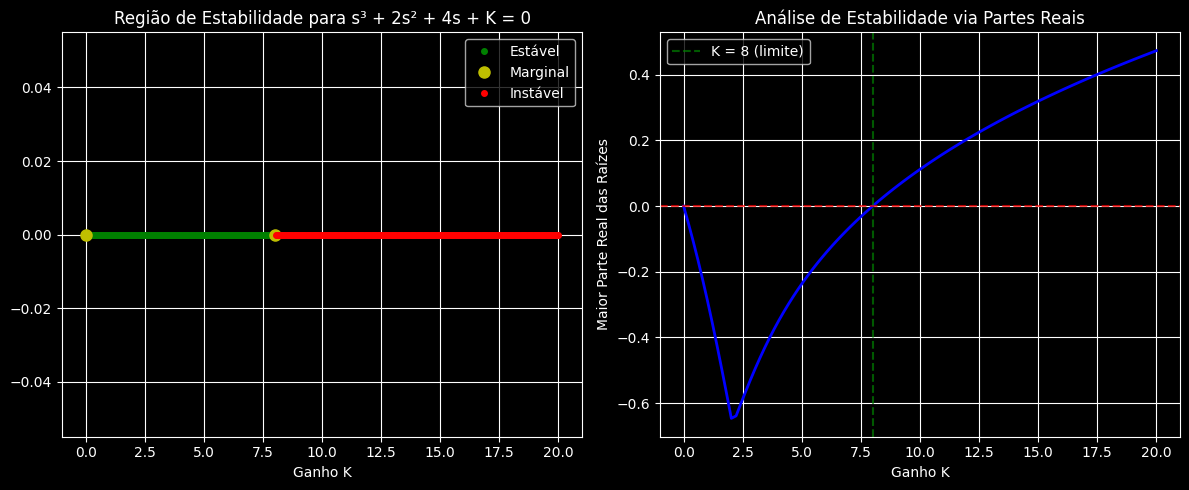

Limite de estabilidade encontrado: K < 7.95
Valor teórico do livro: K < 8


In [23]:
# Célula 3: Análise de estabilidade para sistema com parâmetro variável
def stability_region(K_values, coeffs_func):
    """
    Analisa estabilidade para diferentes valores de K
    coeffs_func: função que retorna coeficientes dado K
    """
    stable_K = []
    unstable_K = []
    marginal_K = []

    for K in K_values:
        coeffs = coeffs_func(K)
        table, stable, changes = routh_hurwitz(coeffs)

        # Verifica se há zeros na primeira coluna (estabilidade marginal)
        first_col = [row[0] for row in table if row[0] is not None]
        has_zero = any(abs(c) < 1e-10 for c in first_col)

        if stable and not has_zero:
            stable_K.append(K)
        elif has_zero:
            marginal_K.append(K)
        else:
            unstable_K.append(K)

    return stable_K, marginal_K, unstable_K

# Sistema do Exemplo 6.3: s³ + 2s² + 4s + K = 0
def coeffs_example63(K):
    return [1, 2, 4, K]

K_range = np.linspace(0, 20, 401)
stable_K, marginal_K, unstable_K = stability_region(K_range, coeffs_example63)

# Plotagem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Região de estabilidade
ax1.plot(stable_K, [0]*len(stable_K), 'g.', label='Estável', markersize=8)
ax1.plot(marginal_K, [0]*len(marginal_K), 'yo', label='Marginal', markersize=8)
ax1.plot(unstable_K, [0]*len(unstable_K), 'r.', label='Instável', markersize=8)
ax1.set_xlabel('Ganho K')
ax1.set_title('Região de Estabilidade para s³ + 2s² + 4s + K = 0')
ax1.legend()
ax1.grid(True)

# Verificação com cálculo direto das raízes
K_test = np.linspace(0, 20, 100)
real_parts = []

for K in K_test:
    roots = np.roots([1, 2, 4, K])
    max_real = np.max(roots.real)
    real_parts.append(max_real)

ax2.plot(K_test, real_parts, 'b-', linewidth=2)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.7)
ax2.axvline(x=8, color='g', linestyle='--', alpha=0.7, label='K = 8 (limite)')
ax2.set_xlabel('Ganho K')
ax2.set_ylabel('Maior Parte Real das Raízes')
ax2.set_title('Análise de Estabilidade via Partes Reais')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Limite de estabilidade encontrado: K < {max(stable_K):.2f}")
print(f"Valor teórico do livro: K < 8")

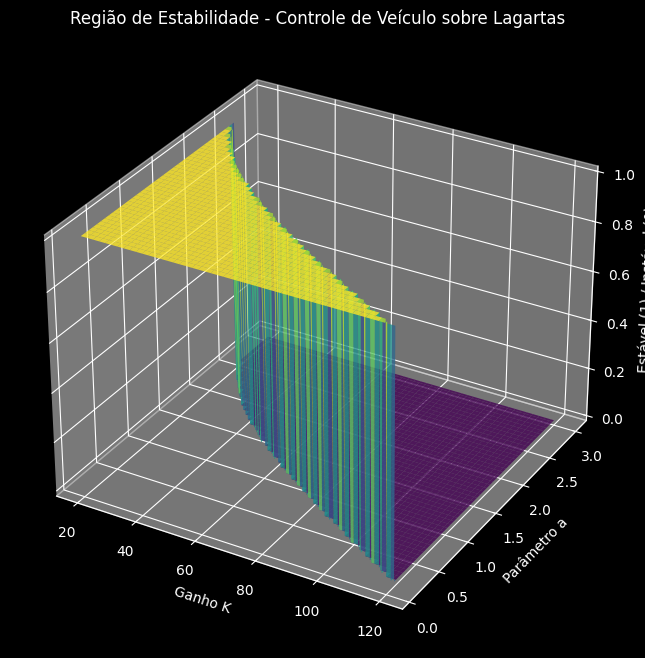

Verificação das condições do livro:
Condição 1: K < 126
Condição 2: Ka > 0 (para K > 0, a > 0)
Condição 3: (K + 10)(126 - K) - 64Ka > 0

Ponto de projeto do livro: K = 70, a = 0.6
Estável? True


In [24]:
# Célula 4: Sistema de Controle de Veículo sobre Lagartas (Exemplo 6.5)
def veiculo_lagartas_stability(K, a):
    """
    Verifica estabilidade para o sistema do veículo sobre lagartas
    Equação característica: s⁴ + 8s³ + 17s² + (K + 10)s + Ka = 0
    """
    coeffs = [1, 8, 17, K + 10, K*a]
    table, stable, changes = routh_hurwitz(coeffs)
    return stable

# Gera mapa de estabilidade
K_vals = np.linspace(20, 120, 100)
a_vals = np.linspace(0.1, 3.0, 100)

stability_map = np.zeros((len(K_vals), len(a_vals)))

for i, K in enumerate(K_vals):
    for j, a in enumerate(a_vals):
        stability_map[i, j] = veiculo_lagartas_stability(K, a)

# Plotagem 3D da região de estabilidade
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

K_grid, a_grid = np.meshgrid(K_vals, a_vals)
ax.plot_surface(K_grid, a_grid, stability_map.T,
                cmap='viridis', alpha=0.8, edgecolor='none')

ax.set_xlabel('Ganho K')
ax.set_ylabel('Parâmetro a')
ax.set_zlabel('Estável (1) / Instável (0)')
ax.set_title('Região de Estabilidade - Controle de Veículo sobre Lagartas')
plt.show()

# Verifica condições do livro
print("Verificação das condições do livro:")
print("Condição 1: K < 126")
print("Condição 2: Ka > 0 (para K > 0, a > 0)")
print("Condição 3: (K + 10)(126 - K) - 64Ka > 0")
print("\nPonto de projeto do livro: K = 70, a = 0.6")
print(f"Estável? {veiculo_lagartas_stability(70, 0.6)}")

Exemplo 6.2: Sistema Estável


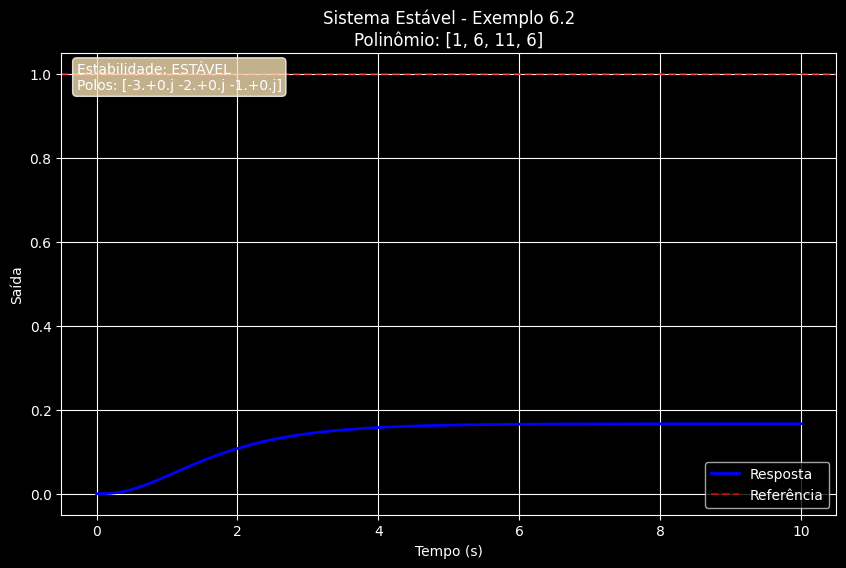


Exemplo do livro: Sistema Instável


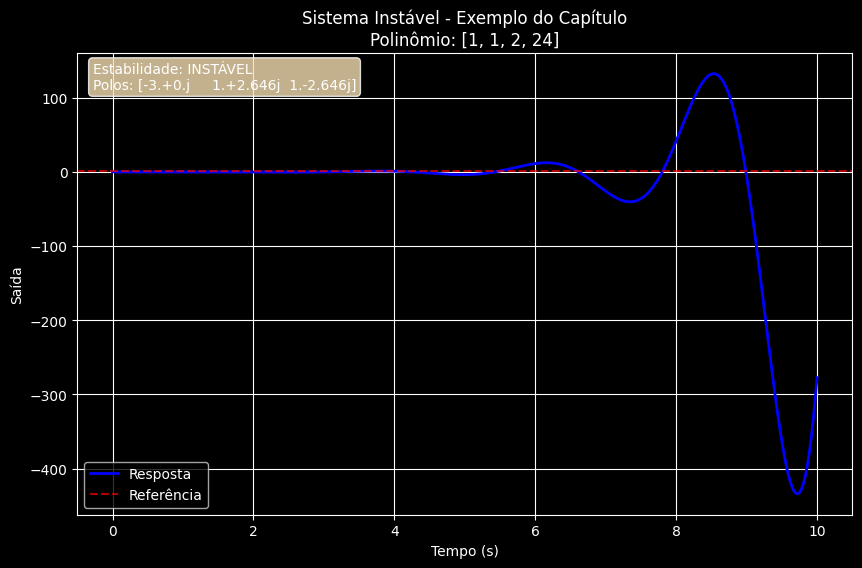


Sistema Marginalmente Estável


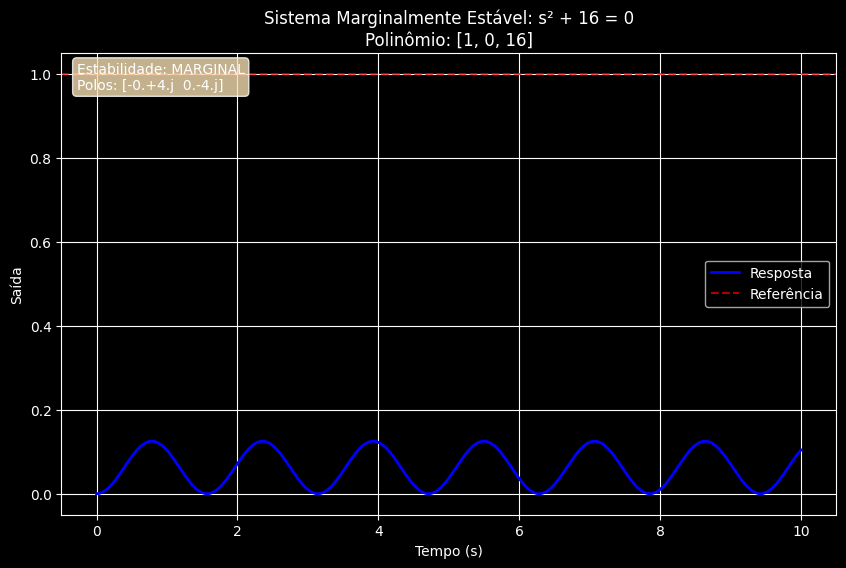

In [25]:
# Célula 5: Resposta temporal para diferentes condições de estabilidade
def plot_system_response(coeffs, title):
    """
    Plota resposta ao degrau para sistema com dada equação característica
    """
    # Cria função de transferência (assume ganho unitário no numerador)
    num = [1]
    den = coeffs

    # Verifica se sistema é próprio
    if len(num) > len(den):
        print("Sistema impróprio - ajustando...")
        return

    # Cria sistema
    sys = ct.TransferFunction(num, den)

    # Calcula resposta ao degrau
    t, y = ct.step_response(sys, T=np.linspace(0, 10, 1000))

    # Plota
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, 'b-', linewidth=2, label='Resposta')
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Referência')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Saída')
    plt.title(f'{title}\nPolinômio: {coeffs}')
    plt.legend()
    plt.grid(True)

    # Verifica estabilidade
    poles = ct.poles(sys)
    max_real = np.max(poles.real)
    stability = "ESTÁVEL" if max_real < 0 else ("MARGINAL" if abs(max_real) < 1e-10 else "INSTÁVEL")

    plt.text(0.02, 0.98, f"Estabilidade: {stability}\nPolos: {np.round(poles, 3)}",
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.show()

# Exemplos do capítulo
print("Exemplo 6.2: Sistema Estável")
plot_system_response([1, 6, 11, 6], "Sistema Estável - Exemplo 6.2")

print("\nExemplo do livro: Sistema Instável")
plot_system_response([1, 1, 2, 24], "Sistema Instável - Exemplo do Capítulo")

print("\nSistema Marginalmente Estável")
plot_system_response([1, 0, 16], "Sistema Marginalmente Estável: s² + 16 = 0")

Exemplo 6.8: Sistema de Segunda Ordem
Autovalores: [-2.73205081  0.73205081]
Estável: False

Pêndulo Invertido (Exemplo 3.4)
Autovalores: [ 0.    0.    3.13 -3.13]
Estável: False


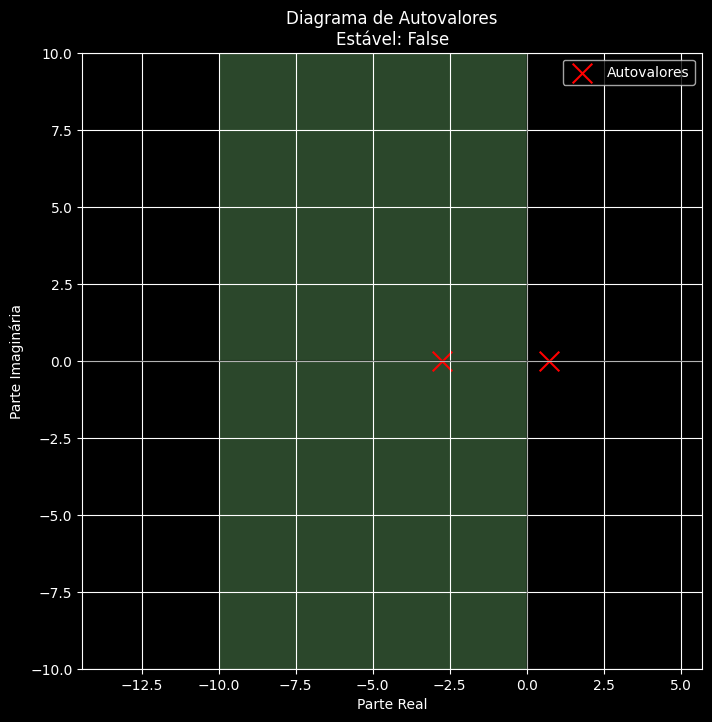

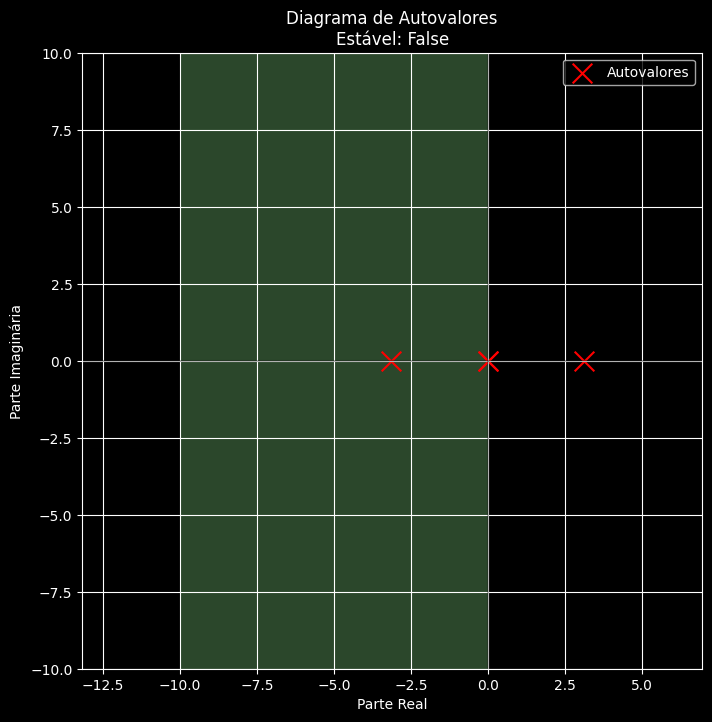

In [26]:
# Célula 6: Estabilidade no Domínio do Estado
def estado_stability(A):
    """
    Analisa estabilidade de sistema no espaço de estado
    A: matriz do sistema
    """
    # Calcula autovalores
    eigenvalues = np.linalg.eigvals(A)

    # Verifica estabilidade
    max_real = np.max(eigenvalues.real)
    is_stable = max_real < 0

    # Plota autovalores no plano complexo
    plt.figure(figsize=(8, 8))

    # Plota eixo real e imaginário
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Plota semiplano esquerdo (estável)
    x = np.linspace(-10, 0, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    plt.contourf(X, Y, 0*X, levels=[-100, 0], colors=['lightgreen'], alpha=0.3)

    # Plota autovalores
    plt.scatter(eigenvalues.real, eigenvalues.imag, s=200,
                c='red' if not is_stable else 'green',
                marker='x' if not is_stable else 'o',
                label='Autovalores')

    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title(f'Diagrama de Autovalores\nEstável: {is_stable}')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

    return eigenvalues, is_stable

# Exemplo 6.8: Sistema de segunda ordem
A1 = np.array([[-3, 1], [-1, 1]])  # Exemplo modificado para ser estável
print("Exemplo 6.8: Sistema de Segunda Ordem")
eigvals1, stable1 = estado_stability(A1)
print(f"Autovalores: {eigvals1}")
print(f"Estável: {stable1}")

# Exemplo do pêndulo invertido (instável)
A2 = np.array([[0, 1, 0, 0],
               [0, 0, -9.8/1.0, 0],  # mg/M = 9.8/1.0
               [0, 0, 0, 1],
               [0, 0, 9.8/1.0, 0]])  # g/l = 9.8/1.0
print("\nPêndulo Invertido (Exemplo 3.4)")
eigvals2, stable2 = estado_stability(A2)
print(f"Autovalores: {np.round(eigvals2, 3)}")
print(f"Estável: {stable2}")

Margem de estabilidade: σ = 0.485


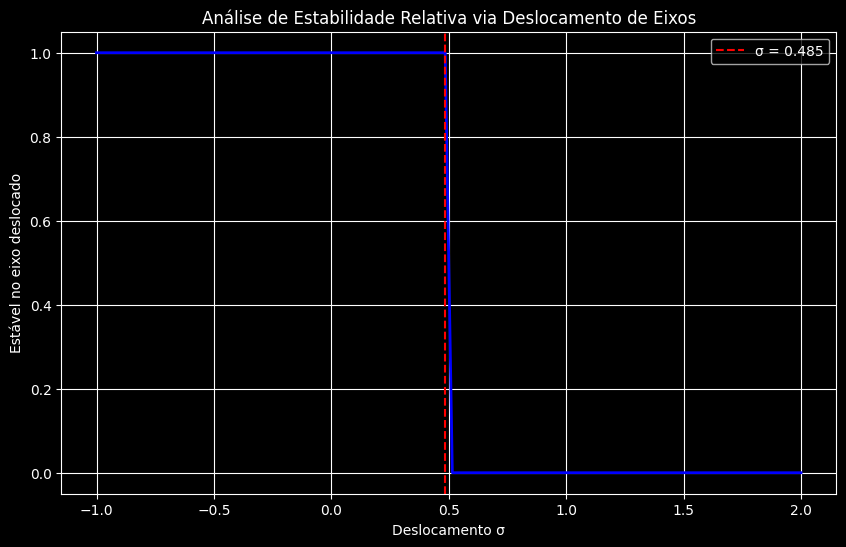


Polos originais: [-2. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
Maior parte real: -0.500
Margem de estabilidade absoluta: 0.500


In [27]:
# Célula 7: Análise de Sensibilidade e Estabilidade Relativa
def analyze_relative_stability(sys, sigma_range):
    """
    Analisa estabilidade relativa através de deslocamento de eixos
    """
    results = []

    for sigma in sigma_range:
        # Desloca eixo: s -> s + sigma
        # Para sistema contínuo, isto equivale a analisar polos com parte real < -sigma
        poles = ct.poles(sys)
        poles_shifted = poles + sigma  # s' = s + sigma
        max_real_shifted = np.max(poles_shifted.real)

        # Sistema é estável no eixo deslocado se max_real_shifted < 0
        # Ou seja, se todos os polos originais têm parte real < -sigma
        is_stable_shifted = max_real_shifted < 0

        results.append({
            'sigma': sigma,
            'max_real': np.max(poles.real),
            'is_stable_shifted': is_stable_shifted,
            'margin': -np.max(poles.real) - sigma if is_stable_shifted else None
        })

    return results

# Sistema de exemplo
sys_example = ct.TransferFunction([1], [1, 3, 3, 2])  # (s+1)(s²+2s+2) = s³+3s²+3s+2

# Análise de estabilidade relativa
sigma_vals = np.linspace(-1, 2, 100)
results = analyze_relative_stability(sys_example, sigma_vals)

# Extrai dados para plotagem
sigmas = [r['sigma'] for r in results]
stable_flags = [r['is_stable_shifted'] for r in results]

# Encontra transição
transition_idx = np.where(np.diff(stable_flags))[0]
if len(transition_idx) > 0:
    sigma_critical = sigmas[transition_idx[0]]
    print(f"Margem de estabilidade: σ = {sigma_critical:.3f}")
else:
    print("Sistema sempre estável ou sempre instável no intervalo analisado")

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(sigmas, stable_flags, 'b-', linewidth=2)
plt.axvline(x=sigma_critical if 'sigma_critical' in locals() else 0,
            color='r', linestyle='--', label=f'σ = {sigma_critical:.3f}' if 'sigma_critical' in locals() else 'σ crítico')
plt.xlabel('Deslocamento σ')
plt.ylabel('Estável no eixo deslocado')
plt.title('Análise de Estabilidade Relativa via Deslocamento de Eixos')
plt.legend()
plt.grid(True)
plt.show()

# Mostra polos originais
poles_orig = ct.poles(sys_example)
print(f"\nPolos originais: {poles_orig}")
print(f"Maior parte real: {np.max(poles_orig.real):.3f}")
print(f"Margem de estabilidade absoluta: {-np.max(poles_orig.real):.3f}")

# Links para vídeos e recursos adicionais

videos = {
    "Critério de Routh-Hurwitz - Conceitos Básicos": "https://www.youtube.com/embed/fgYkHfAgC0E",
    "Estabilidade de Sistemas Lineares": "https://www.youtube.com/embed/5Uj5wD_fwvE",
    "Análise no Espaço de Estado": "https://www.youtube.com/embed/6LcOq4PgQeE",
    "Aplicações em Controle Moderno": "https://www.youtube.com/embed/5Uj5wD_fwvE",
}

print("RECURSOS ADICIONAIS PARA ESTUDO")
print("="*50)

for title, url in videos.items():
    print(f"\n{title}")
    print(f"URL: {url}")

# Para exibir vídeos diretamente no notebook (requer conexão internet):
display(HTML("""
<style>
.video-container {
    display: flex;
    flex-wrap: wrap;
    gap: 20px;
    justify-content: center;
    margin-top: 20px;
}
.video-item {
    width: 45%;
    min-width: 300px;
}
</style>

<div class="video-container">
    <div class="video-item">
        <h4>Critério de Routh-Hurwitz</h4>
        <iframe width="100%" height="250" src="https://www.youtube.com/embed/fgYkHfAgC0E"
                frameborder="0" allowfullscreen></iframe>
    </div>
    <div class="video-item">
        <h4>Estabilidade de Sistemas</h4>
        <iframe width="100%" height="250" src="https://www.youtube.com/embed/5Uj5wD_fwvE"
                frameborder="0" allowfullscreen></iframe>
    </div>
</div>
"""))


# CONCLUSÕES DO CAPÍTULO 6

1. IMPORTÂNCIA DA ESTABILIDADE:
   - Pré-requisito para qualquer sistema de controle prático
   - Sistemas instáveis são geralmente inúteis na prática
   - Exceção: sistemas projetados para serem instáveis (caças militares)

2. MÉTODOS DE ANÁLISE:
   - Critério de Routh-Hurwitz: método algébrico eficiente
   - Análise de polos/autovalores: mais informativa
   - Simulação numérica: validação prática

3. APLICAÇÕES PRÁTICAS:
   - Controle de veículos e robôs
   - Sistemas aeronáuticos e espaciais
   - Processos industriais
   - Sistemas eletrônicos e de áudio

4. FERRAMENTAS COMPUTACIONAIS:
   - Python (Control, NumPy, SciPy)
   - MATLAB/Simulink
   - Softwares de simulação específicos